In [155]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [7]:
!sudo pip3 install gensim

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 24.2MB 62kB/s s eta 0:00:01
    100% |████████████████████████████████| 26.1MB 53kB/s s eta 0:00:01   32% |██████████▍                     | 8.5MB 90.8MB/s eta 0:00:01    69% |██████████████████████▎         | 18.1MB 100.7MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 14.1MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 11.9MB/s ta 0:00:01
    100% |████████████████████████████████| 1.4MB 1.1MB/s  eta 0:00:01
    100% |████

In [156]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [10]:
!sudo pip3 install spacy

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 10.4MB 144kB/s  eta 0:00:01
    100% |████████████████████████████████| 3.7MB 417kB/s  eta 0:00:01
    100% |████████████████████████████████| 122kB 12.2MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 8.2MB/s  eta 0:00:01
    100% |████████████████████████████████| 2.2MB 704kB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 14.2MB/s ta 0:00:01


In [157]:
# spacy for lemmatization
import spacy

In [13]:
!sudo pip3 install pyldavis

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 1.6MB 920kB/s eta 0:00:01
    100% |████████████████████████████████| 552kB 2.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.8MB/s  eta 0:00:01
    100% |████████████████████████████████| 296kB 5.1MB/s  eta 0:00:01
    100% |████████████████████████████████| 163kB 8.8MB/s  eta 0:00:01
    100% |████████████████████████████████| 235kB 6.3MB/s  eta 0:00:01
    100% |████████████████████████████████| 51kB 16.7MB/s ta 0:00:01
    100% |███

In [15]:
!sudo pip3 install matplotlib

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 13.1MB 114kB/s  eta 0:00:01
    100% |████████████████████████████████| 92kB 13.8MB/s ta 0:00:01


In [158]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [19]:
!sudo pip3 install nltk

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 1.5MB 1.1MB/s eta 0:00:01
  Running setup.py install for nltk ... done


In [160]:
# Download nltk stopwords and spacy model
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [227]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['year', 'com', 'day', 'datum'])

In [228]:
print(len(stop_words))

183


##**Import Dataset**

In [229]:
import warnings
warnings.filterwarnings("ignore")

# Import Dataset
df = pd.read_csv("data_amazon.csv")

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
Date              20 non-null object
Firm              20 non-null object
Speech_to_Text    20 non-null object
Unnamed: 3        1 non-null object
Unnamed: 4        1 non-null object
dtypes: object(5)
memory usage: 1.0+ KB


In [209]:
pd.set_option('display.max_columns', 100)
print(df)

        Date    Firm                                     Speech_to_Text  \
0   1997.1.1  AMAZON  To our shareholders: Amazon.com passed many mi...   
1   1998.1.1  AMAZON  To our shareholders, customers, and employees:...   
2   1999.1.1  AMAZON  To our shareholders, customers, and employees:...   
3   2000.1.1  AMAZON  To our shareholders: The first 4½ years of our...   
4   2001.1.1  AMAZON  To our shareholders: Ouch. It’s been a brutal ...   
5   2002.1.1  AMAZON  To our shareholders: In July of last year, Ama...   
6   2003.1.1  AMAZON  To our shareholders: In many ways, Amazon.com ...   
7   2004.1.1  AMAZON  To our shareholders: Long-term thinking is bot...   
8   2006.1.1  AMAZON  To our shareholders: Many of the important dec...   
9   2007.1.1  AMAZON  To our shareholders: At Amazon’s current scale...   
10  2008.1.1  AMAZON  To our shareowners: November 19, 2007, was a s...   
11  2009.1.1  AMAZON  To our shareowners: In this turbulent global e...   
12  2010.1.1  AMAZON  To 

In [210]:
# Convert email body to list
data = df.Speech_to_Text.values.tolist()

In [211]:
print(data)

['To our shareholders: Amazon.com passed many milestones in 1997: by year-end, we had served more than 1.5 million customers, yielding 838% revenue growth to $147.8 million, and extended our market leadership despite aggressive competitive entry. But this is Day 1 for the Internet and, if we execute well, for Amazon.com. Today, online commerce saves customers money and precious time. Tomorrow, through personalization, online commerce will accelerate the very process of discovery. Amazon.com uses the Internet to create real value for its customers and, by doing so, hopes to create an enduring franchise, even in established and large markets. We have a window of opportunity as larger players marshal the resources to pursue the online opportunity and as customers, new to purchasing online, are receptive to forming new relationships. The competitive landscape has continued to evolve at a fast pace. Many large players have moved online with credible offerings and have devoted substantial en

In [232]:
df = [re.sub('year',"", line) for line in df] #'year', 'com', 'day', 'datum'
df = [re.sub('com',"", line) for line in df]
df = [re.sub('day',"", line) for line in df]
df = [re.sub('datum',"", line) for line in df]

##**Tokenize words and Clean-up text**

In [233]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[3])

['to', 'our', 'shareholders', 'the', 'first', 'years', 'of', 'our', 'journey', 'have', 'yielded', 'some', 'amazing', 'results', 'we', 've', 'now', 'served', 'over', 'million', 'customers', 'in', 'over', 'countries', 'and', 'built', 'the', 'leading', 'global', 'commerce', 'brand', 'and', 'platform', 'in', 'the', 'coming', 'years', 'we', 'expect', 'to', 'benefit', 'from', 'the', 'continued', 'adoption', 'of', 'online', 'commerce', 'around', 'the', 'world', 'as', 'millions', 'of', 'new', 'consumers', 'connect', 'to', 'the', 'internet', 'for', 'the', 'first', 'time', 'as', 'the', 'online', 'shopping', 'experience', 'continues', 'to', 'improve', 'consumer', 'trust', 'and', 'confidence', 'will', 'increase', 'driving', 'further', 'adoption', 'and', 'if', 'we', 'at', 'amazon', 'com', 'do', 'our', 'job', 'right', 'we', 'can', 'be', 'uniquely', 'positioned', 'to', 'serve', 'these', 'new', 'customers', 'best', 'and', 'benefit', 'as', 'result', 'recap', 'of', 'during', 'our', 'relentless', 'focus'

##**Creating Bigram and Trigram Models**

In [234]:
from gensim.models.phrases import Phrases, Phraser

# Build the bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['to', 'our', 'shareholders', 'in', 'july', 'of', 'last', 'year', 'amazon', 'com', 'reached', 'an', 'important', 'way', 'station', 'after', 'four', 'years', 'of', 'single', 'minded', 'focus', 'on', 'growth', 'and', 'then', 'just', 'under', 'two', 'years', 'spent', 'almost', 'exclusively', 'on', 'lowering', 'costs', 'we', 'reached', 'point', 'where', 'we', 'could', 'afford', 'to', 'balance', 'growth', 'and', 'cost', 'improvement', 'dedicating', 'resources', 'and', 'staffed', 'projects', 'to', 'both', 'our', 'major', 'price', 'reduction', 'in', 'july', 'moving', 'to', 'discount', 'books', 'over', 'by', 'off', 'list', 'marked', 'this', 'change', 'this', 'balance', 'began', 'to', 'pay', 'off', 'in', 'the', 'fourth_quarter', 'when', 'we', 'both', 'significantly', 'exceeded', 'our', 'own', 'goals', 'on', 'the', 'bottom', 'line', 'and', 'simultaneously', 'reaccelerated', 'growth', 'in', 'our', 'business', 'we', 'lowered', 'prices', 'again', 'in', 'january', 'when', 'we', 'offered', 'new', 'cl

##**Remove Stopwords, Make Bigrams and Lemmatize**

In [235]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']): # 'ADJ', 'VERB', 'ADV'
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [236]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [237]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [193]:
!sudo pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.0.0/en_core_web_md-2.0.0.tar.gz

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 120.9MB 11kB/s s eta 0:00:01   78% |█████████████████████████▏      | 95.1MB 106.8MB/s eta 0:00:01


In [49]:
!sudo pip3 install -U spacy download en_core_web_sm

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages
Requirement already up-to-date: en_core_web_sm in /usr/local/lib/python3.6/dist-packages
    100% |████████████████████████████████| 593kB 2.5MB/s eta 0:00:01
Requirement already up-to-date: catalogue<1.1.0,>=0.0.7 in /usr/local/lib/python3.6/dist-packages (from spacy)
Requirement already up-to-date: srsly<1.1.0,>=0.1.0 in /usr/local/lib/python3.6/dist-packages (from spacy)
Requirement already up-to-date: numpy>=1.15.0 in /

In [247]:
import en_core_web_sm

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = en_core_web_sm.load()
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [248]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])

In [249]:
print(data_lemmatized[:1])

[['shareholder', 'milestone', 'end', 'customer', 'revenue', 'growth', 'market_leadership', 'entry', 'internet', 'today', 'customer', 'money', 'time', 'tomorrow', 'personalization', 'commerce', 'process', 'discovery', 'internet', 'value', 'customer', 'hope', 'franchise', 'market', 'window', 'opportunity', 'player', 'resource', 'opportunity', 'customer', 'online', 'relationship', 'landscape', 'pace', 'player', 'offering', 'energy', 'resource', 'awareness', 'traffic', 'sale', 'goal', 'position', 'commerce', 'opportunity', 'area', 'opportunity', 'market', 'strategy', 'risk', 'investment', 'execution', 'franchise', 'leader', 'measure', 'success', 'shareholder', 'value', 'value', 'result', 'ability', 'position', 'model', 'translate', 'revenue', 'profitability', 'capital', 'velocity', 'return', 'capital', 'decision', 'focus', 'measure', 'metric', 'customer', 'revenue', 'growth', 'degree', 'customer', 'basis', 'strength', 'brand', 'leverage', 'customer', 'base', 'brand', 'infrastructure', 'mov

##**Create the Dictionary and Corpus needed for Topic Modeling**

In [250]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 5), (23, 1), (24, 3), (25, 1), (26, 2), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 5), (34, 2), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 2), (42, 24), (43, 1), (44, 4), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 2), (53, 5), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 2), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 7), (67, 1), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 3), (74, 1), (75, 2), (76, 5), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 4), (84, 3), (85, 1), (86, 1), (87, 14), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 5), (99, 2), (100, 4), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 2), (109, 1), (110, 

In [251]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 2),
  ('account', 1),
  ('accounting', 1),
  ('acquisition', 1),
  ('advantage', 1),
  ('amazon', 1),
  ('appearance', 1),
  ('approach', 3),
  ('area', 1),
  ('attract', 1),
  ('audience', 1),
  ('availability', 1),
  ('awareness', 1),
  ('balance', 1),
  ('bar', 1),
  ('base', 4),
  ('basis', 1),
  ('benefit', 1),
  ('book', 1),
  ('brand', 3),
  ('browse', 1),
  ('browsing', 1),
  ('business', 5),
  ('capacity', 1),
  ('capital', 3),
  ('case', 1),
  ('cash', 2),
  ('cash_flow', 1),
  ('center', 2),
  ('certificate', 1),
  ('choice', 1),
  ('choose', 1),
  ('claim', 1),
  ('commerce', 5),
  ('company', 2),
  ('compensation', 1),
  ('competition', 1),
  ('consideration', 2),
  ('content', 1),
  ('convenience', 1),
  ('cost', 1),
  ('culture', 2),
  ('customer', 24),
  ('day', 1),
  ('decision', 4),
  ('decision_making', 1),
  ('degree', 1),
  ('delivery', 1),
  ('discovery', 1),
  ('distribution', 2),
  ('effectiveness', 1),
  ('element', 1),
  ('emphasis', 2),
  ('empl

##**Building the Topic Model**

In [252]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

##**View the topics in LDA model**

In [253]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"customer" + 0.024*"seller" + 0.020*"service" + 0.013*"business" + '
  '0.011*"time" + 0.010*"company" + 0.010*"sale" + 0.010*"program" + '
  '0.009*"aw" + 0.009*"team"'),
 (1,
  '0.023*"customer" + 0.020*"author" + 0.017*"company" + 0.014*"time" + '
  '0.013*"book" + 0.013*"service" + 0.013*"seller" + 0.011*"month" + '
  '0.010*"price" + 0.010*"reader"'),
 (2,
  '0.053*"customer" + 0.015*"product" + 0.012*"book" + 0.011*"team" + '
  '0.010*"business" + 0.010*"time" + 0.010*"service" + 0.010*"company" + '
  '0.009*"store" + 0.008*"year"'),
 (3,
  '0.056*"customer" + 0.033*"business" + 0.013*"experience" + 0.013*"product" '
  '+ 0.012*"store" + 0.011*"company" + 0.010*"year" + 0.010*"shareholder" + '
  '0.010*"sale" + 0.009*"time"'),
 (4,
  '0.053*"customer" + 0.013*"service" + 0.013*"time" + 0.012*"experience" + '
  '0.012*"system" + 0.012*"business" + 0.011*"approach" + 0.010*"example" + '
  '0.010*"price" + 0.009*"datum"'),
 (5,
  '0.003*"customer" + 0.001*"business" + 

##**Compute Model Coherence Score**

In [254]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.26876575882268744


In [255]:
# Visualize the topics
pyLDAvis.enable_notebook(sort=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

##**How to find the optimal number of topics for LDA?**

In [153]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [154]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)

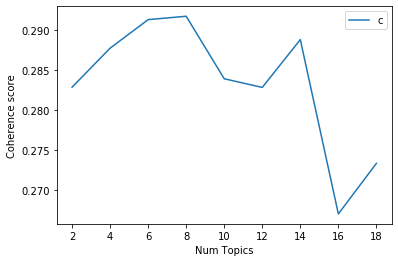

In [125]:
# Show graph
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [127]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2829
Num Topics = 4  has Coherence Value of 0.2877
Num Topics = 6  has Coherence Value of 0.2913
Num Topics = 8  has Coherence Value of 0.2917
Num Topics = 10  has Coherence Value of 0.2839
Num Topics = 12  has Coherence Value of 0.2828
Num Topics = 14  has Coherence Value of 0.2888
Num Topics = 16  has Coherence Value of 0.267
Num Topics = 18  has Coherence Value of 0.2733


In [78]:
print(len(model_list))

9


In [79]:
# Select the model and print the topics
optimal_model = model_list[2] # Num Topics = 6
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.023*"customer" + 0.011*"year" + 0.007*"business" + 0.006*"new" + '
  '0.006*"experience" + 0.006*"work" + 0.006*"make" + 0.006*"time" + '
  '0.005*"many" + 0.005*"service"'),
 (1,
  '0.012*"customer" + 0.008*"year" + 0.008*"service" + 0.006*"many" + '
  '0.005*"company" + 0.005*"time" + 0.005*"prime" + 0.005*"work" + '
  '0.004*"business" + 0.004*"make"'),
 (2,
  '0.028*"customer" + 0.010*"year" + 0.007*"product" + 0.007*"service" + '
  '0.007*"new" + 0.007*"many" + 0.006*"business" + 0.006*"work" + 0.006*"book" '
  '+ 0.006*"good"'),
 (3,
  '0.025*"customer" + 0.009*"year" + 0.008*"business" + 0.007*"seller" + '
  '0.007*"new" + 0.007*"time" + 0.007*"company" + 0.006*"good" + '
  '0.006*"service" + 0.005*"work"'),
 (4,
  '0.022*"customer" + 0.012*"year" + 0.007*"make" + 0.007*"new" + '
  '0.006*"business" + 0.006*"work" + 0.006*"product" + 0.005*"com" + '
  '0.005*"many" + 0.005*"service"'),
 (5,
  '0.020*"customer" + 0.009*"year" + 0.007*"new" + 0.006*"service" + '
  '0.006

##**Finding the dominant topic in each sentence**

In [256]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7912,"customer, year, business, seller, new, time, c...",To our shareholders: Amazon.com passed many mi...
1,1,3.0,0.8206,"customer, year, business, seller, new, time, c...","To our shareholders, customers, and employees:..."
2,2,3.0,0.8173,"customer, year, business, seller, new, time, c...","To our shareholders, customers, and employees:..."
3,3,3.0,0.8691,"customer, year, business, seller, new, time, c...",To our shareholders: The first 4½ years of our...
4,4,3.0,0.6844,"customer, year, business, seller, new, time, c...",To our shareholders: Ouch. It’s been a brutal ...
5,5,4.0,0.8920,"customer, year, make, new, business, work, pro...","To our shareholders: In July of last year, Ama..."
6,6,4.0,0.6041,"customer, year, make, new, business, work, pro...","To our shareholders: In many ways, Amazon.com ..."
7,7,4.0,0.8341,"customer, year, make, new, business, work, pro...",To our shareholders: Long-term thinking is bot...
8,8,4.0,0.8433,"customer, year, make, new, business, work, pro...",To our shareholders: Many of the important dec...
9,9,4.0,0.9958,"customer, year, make, new, business, work, pro...",To our shareholders: At Amazon’s current scale...


##**Find the most representative document for each topic**

In [257]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1667,"customer, year, business, new, experience, wor...",NaN
1,2.0,0.5174,"customer, year, product, service, new, many, b...","To our shareowners: This year, Amazon became t..."
2,3.0,0.9083,"customer, year, business, seller, new, time, c...","“Jeff, what does Day 2 look like?” That’s a qu..."
3,4.0,0.9958,"customer, year, make, new, business, work, pro...",To our shareholders: At Amazon’s current scale...


##**Topic distribution across documents**

In [258]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"customer, year, business, seller, new, time, c...",3.0,0.1304
1.0,3.0,"customer, year, business, seller, new, time, c...",NaN,NaN
2.0,3.0,"customer, year, business, seller, new, time, c...",1.0,0.0435
3.0,3.0,"customer, year, business, seller, new, time, c...",13.0,0.5652
4.0,3.0,"customer, year, business, seller, new, time, c...",6.0,0.2609
5.0,4.0,"customer, year, make, new, business, work, pro...",NaN,NaN
6.0,4.0,"customer, year, make, new, business, work, pro...",NaN,NaN
7.0,4.0,"customer, year, make, new, business, work, pro...",NaN,NaN
8.0,4.0,"customer, year, make, new, business, work, pro...",NaN,NaN
9.0,4.0,"customer, year, make, new, business, work, pro...",NaN,NaN


#**Visualization**

###**Word CLouds of Top N Keywords in each topic**

In [90]:
!sudo pip3 install wordcloud

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 368kB 3.7MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 709kB/s eta 0:00:01


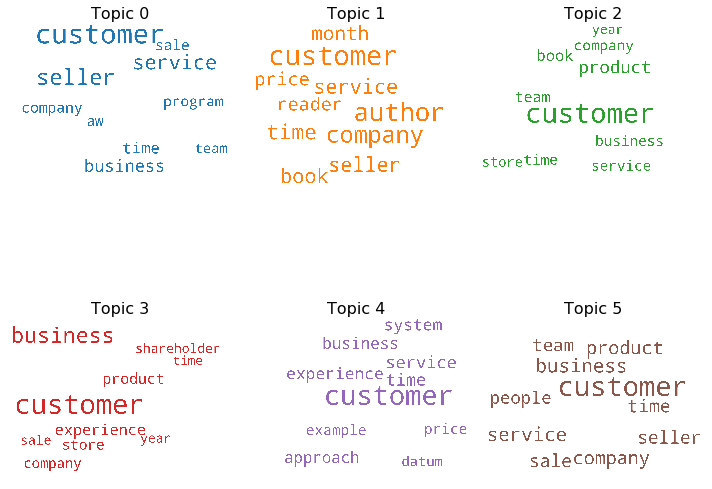

In [272]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

###**Word Counts of Topic Keywords**

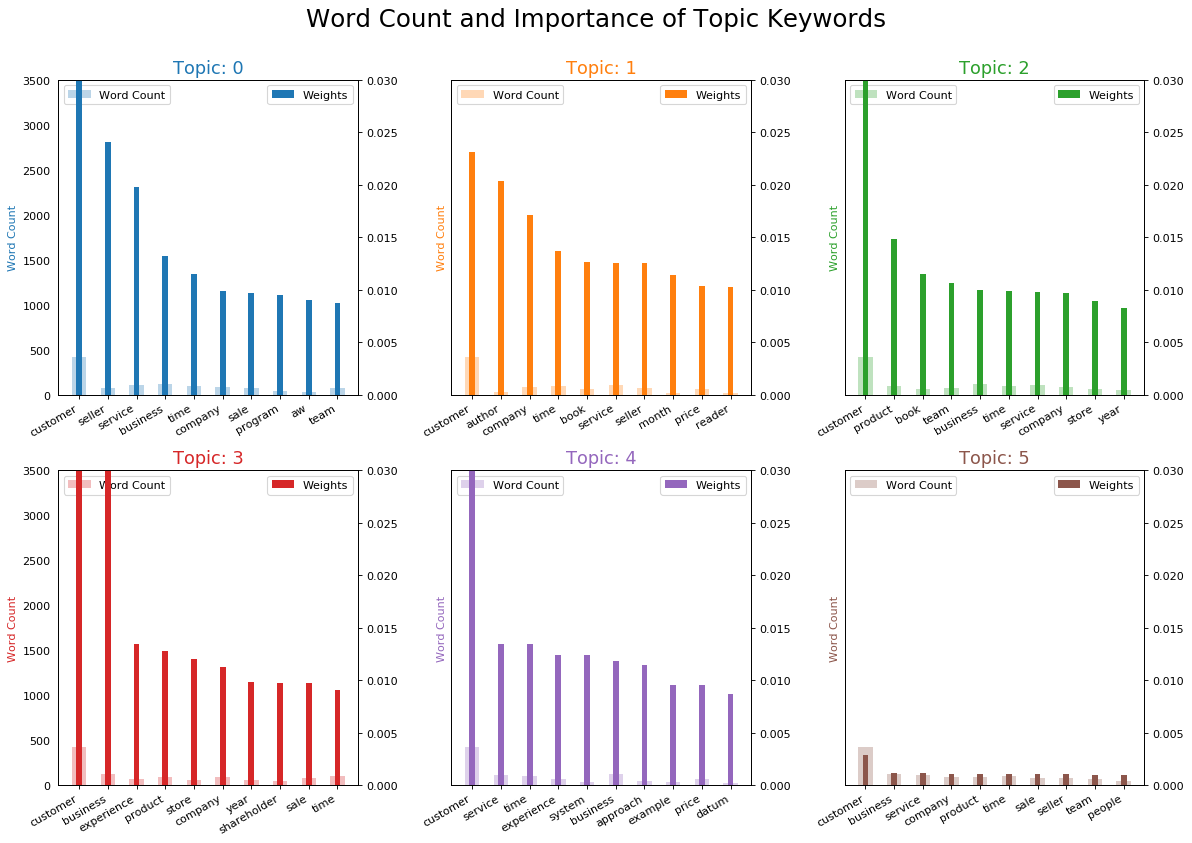

In [260]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in  data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=True, dpi=80)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

###**Sentence Chart Colored by Topic**

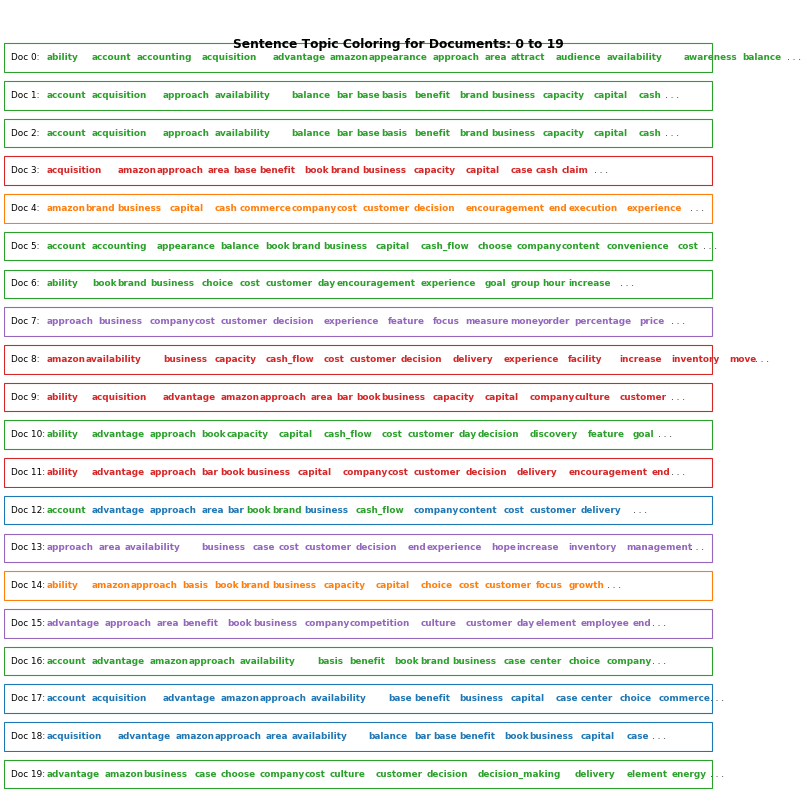

In [269]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 21):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=40)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=40)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

###**Number of Documents by Dominant Topic, Weightage**

In [262]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 7]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

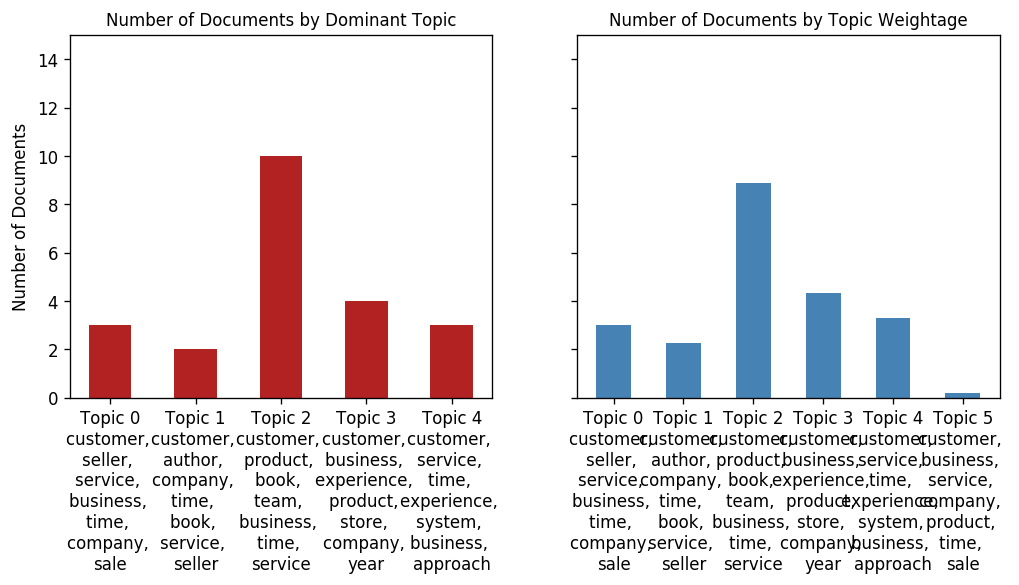

In [263]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 15)


# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

###**pyLDAVis**

In [112]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.032553 -0.034431       1        1  45.461910
3      0.126385  0.028233       2        1  26.892153
5     -0.015467  0.060424       3        1  12.099430
2     -0.011818 -0.108621       4        1  11.433701
0     -0.024288  0.036636       5        1   4.110281
4     -0.107364  0.017759       6        1   0.002528, topic_info=    Category        Freq        Term       Total  loglift  logprob
89   Default  382.000000    customer  382.000000  30.0000  30.0000
425  Default  158.000000        year  158.000000  29.0000  29.0000
628  Default   73.000000      seller   73.000000  28.0000  28.0000
254  Default   33.000000       order   33.000000  27.0000  27.0000
65   Default   79.000000     company   79.000000  26.0000  26.0000
..       ...         ...         ...         ...      ...      ...
128   Topic6    0.000211  experience   65.301582  -2.0564  -7.5525
377   Topic6    0.000210        team   65.917770  -2.0692  -7.5558
90    Topic6    0.000210         day   66.015724  -2.0718  -7.5570
283   Topic6    0.000208       price   59.304485  -1.9769  -7.5693
81    Topic6    0.000206        cost   55.526161  -1.9173  -7.5755

[472 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1080      1  0.902603  action
9         1  0.449874     add
9         2  0.209941     add
9         4  0.239933     add
9         5  0.059983     add
...     ...       ...     ...
425       1  0.411193    year
425       2  0.284672    year
425       3  0.094891    year
425       4  0.145499    year
425       5  0.056934    year

[781 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 3, 1, 5])